In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT NECESSARY LIBS

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

LOAD DATASET

In [207]:
df = pd.read_csv("/content/drive/MyDrive/dataset1/marketing_data.csv")

In [208]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2005/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2004/08/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2003/07/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012/03/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [209]:
df.shape

(2240, 28)

In [210]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

1.Investigate Variables:

In [211]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


I fixed the error with the space in Excel
before loading data

In [212]:
print(df['Income'].head())

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object


In [213]:
print(df['Dt_Customer'].head())

0       6/16/14
1       6/15/14
2       5/13/14
3    2005/11/14
4    2004/08/14
Name: Dt_Customer, dtype: object


tidying up the data

In [214]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [215]:
print(df['Dt_Customer'].head())

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2005-11-14
4   2004-08-14
Name: Dt_Customer, dtype: datetime64[ns]


Treatment of null values

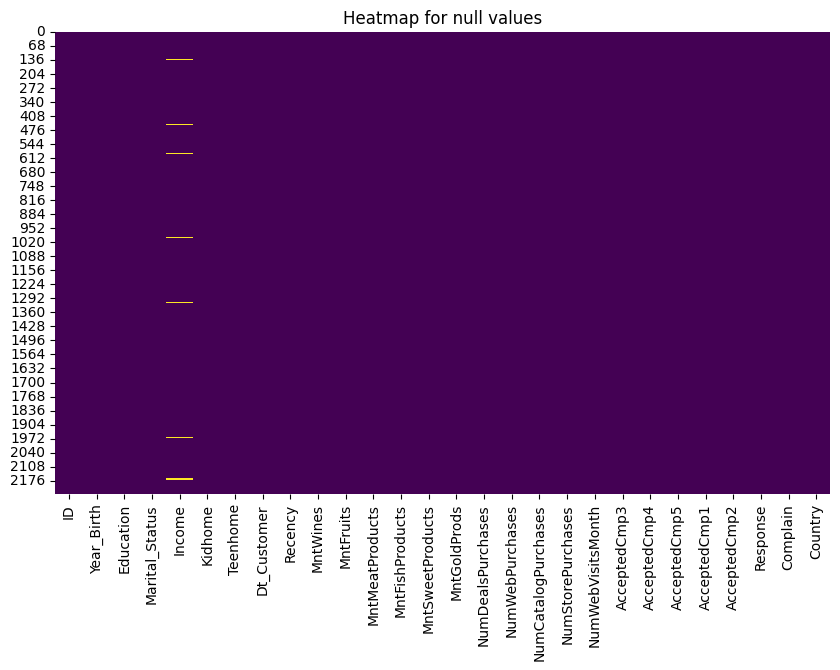

In [216]:
#heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Heatmap for null values')

plt.show()

In [217]:
# first lets conver income to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

In [218]:
# Calculate the average income per group
income_mean_by_group = df.groupby(['Year_Birth', 'Education', 'Marital_Status', 'Country'])['Income'].mean()

In [219]:
# Impute missing values ​​with the group mean
df['Income'] = df.groupby(['Year_Birth', 'Education', 'Marital_Status', 'Country'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [220]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 16
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


•	Create variables to populate the total number of children, age, and total spending.

In [221]:
# Create the variable for the total number of children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [222]:
# Create the variable for age
# Let's assume the current date is '2023-11-30'
current_year = 2023
df['Age'] = current_year - df['Year_Birth']

In [223]:
# Create the variable for total expenditure
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']

In [224]:
# View the first lines of the DataFrame with the new variables
print(df[['TotalChildren', 'Age', 'TotalSpending']].head())

   TotalChildren  Age  TotalSpending
0              0   53           1190
1              0   62            577
2              1   65            251
3              2   56             11
4              1   34             91


•	Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

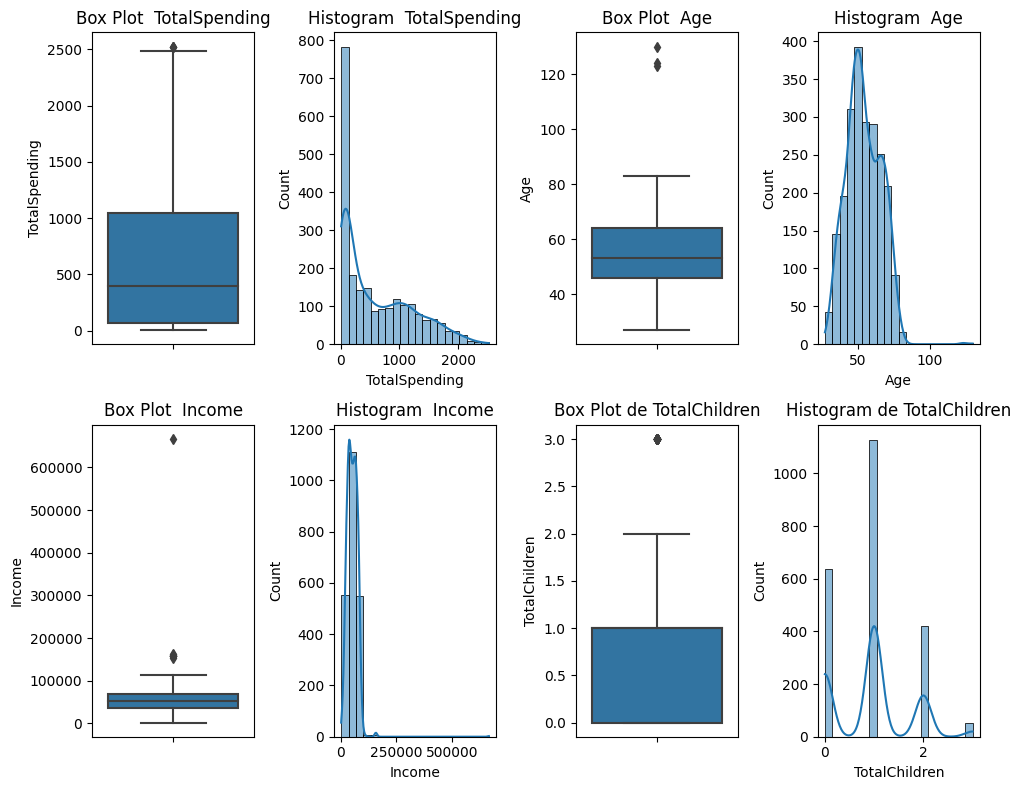

In [225]:
# Create subplots for multiple variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))

# Box plot and histogram for 'TotalSpending'
sns.boxplot(y='TotalSpending', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot  TotalSpending')
sns.histplot(df['TotalSpending'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram  TotalSpending')

# Box plot and histogram for 'Income'
sns.boxplot(y='Income', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot  Income')
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram  Income')


# Box plot and histogram for 'Age'
sns.boxplot(y='Age', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot  Age')
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Histogram  Age')

# Box plot and histogram for 'TotalChildren'
sns.boxplot(y='TotalChildren', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Box Plot de TotalChildren')
sns.histplot(df['TotalChildren'], bins=20, kde=True, ax=axes[1, 3])
axes[1, 3].set_title('Histogram de TotalChildren')

# Add layout
plt.tight_layout()
plt.show()

# Treatment outliers

Income outliers

In [226]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [227]:
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
325          0  2013-04-29       13         1  ...             0   
497          0  2008-04-12       21        55  ...             0   
527          0  2006-02-13       23         9  ...             0   
731          1  2006-03-13       31        85  ...          

In [228]:
# upper limit for 'Income'
upper_cap = 120000
df['Income_capped'] = np.where(df['Income'] > upper_cap, upper_cap, df['Income'])

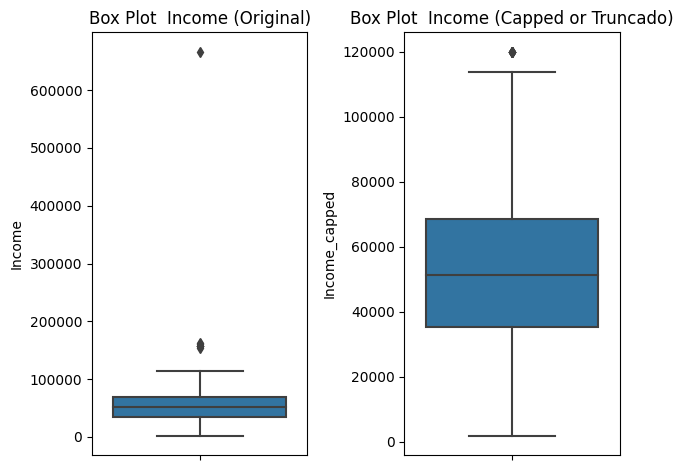

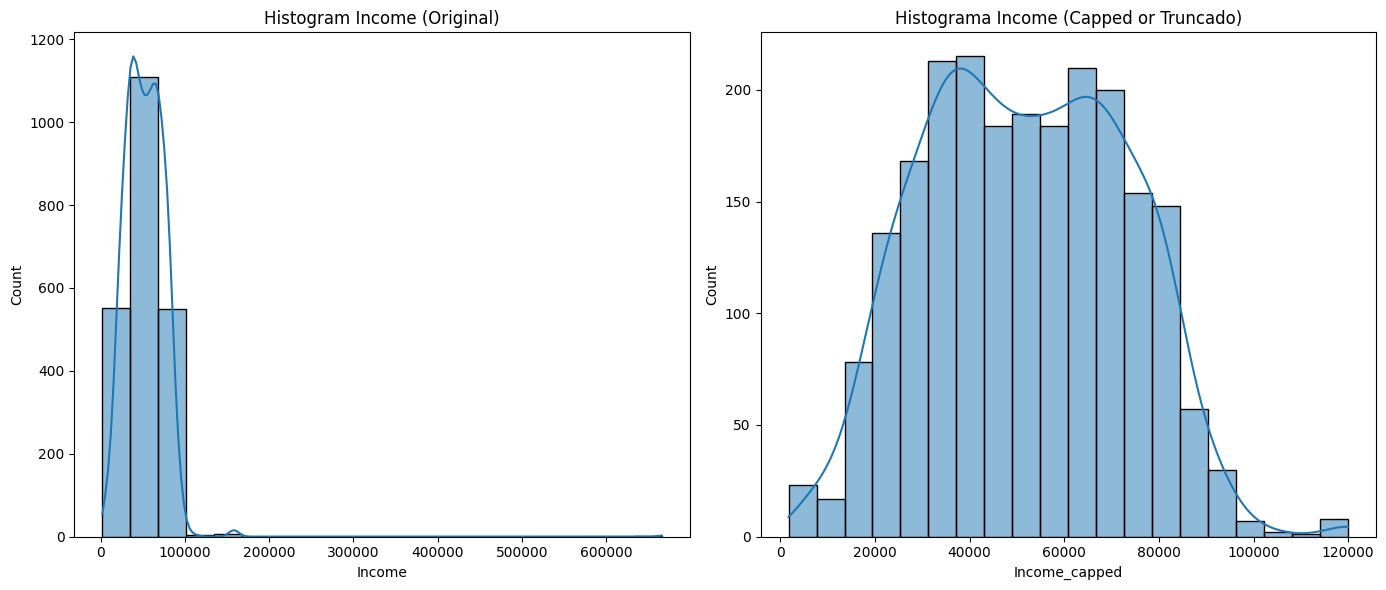

In [229]:
# Box plots
plt.subplot(1, 2, 1)
sns.boxplot(y='Income', data=df)
plt.title('Box Plot  Income (Original)')

plt.subplot(1, 2, 2)
sns.boxplot(y='Income_capped', data=df)

plt.title('Box Plot  Income (Capped or Truncado)')

plt.tight_layout()
plt.show()

# Histograns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Histogram Income (Original)')

plt.subplot(1, 2, 2)
sns.histplot(df['Income_capped'], bins=20, kde=True)

plt.title('Histograma Income (Capped or Truncado)')

plt.tight_layout()
plt.show()

Age outliers

remove outliers

In [230]:
print("Estatísticas descritivas antes da remoção:")
print(df['Age'].describe())

Estatísticas descritivas antes da remoção:
count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64


In [231]:
age_upper_limit = 100

In [232]:
df = df[df['Age'] <= age_upper_limit]

In [233]:
print("\nEstatísticas descritivas após a remoção:")
print(df['Age'].describe())


Estatísticas descritivas após a remoção:
count    2237.000000
mean       54.098346
std        11.701917
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64


## •	Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [234]:
# Map ordinal categories to numbers
education_mapping = {'High School': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}

In [235]:
# Apply ordinal coding to the 'Education' column
df['Education_Ordinal'] = df['Education'].map(education_mapping)

<ipython-input-235-bacc841b33c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Ordinal'] = df['Education'].map(education_mapping)


In [236]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalChildren,Age,TotalSpending,Income_capped,Education_Ordinal
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,53,1190,84835.0,2.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,62,577,57091.0,2.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,65,251,67267.0,2.0
3,1386,1967,Graduation,Together,32474.0,1,1,2005-11-14,0,10,...,0,0,0,0,AUS,2,56,11,32474.0,2.0
4,5371,1989,Graduation,Single,21474.0,1,0,2004-08-14,0,6,...,0,0,1,0,SP,1,34,91,21474.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2003-07-13,99,372,...,0,0,0,0,US,1,47,689,66476.0,4.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,SP,1,46,55,31056.0,NaN
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,0,0,0,0,SP,1,47,309,46310.0,2.0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,IND,0,45,1383,65819.0,2.0


# •	Create a heatmap to showcase the correlation between different pairs of variables.

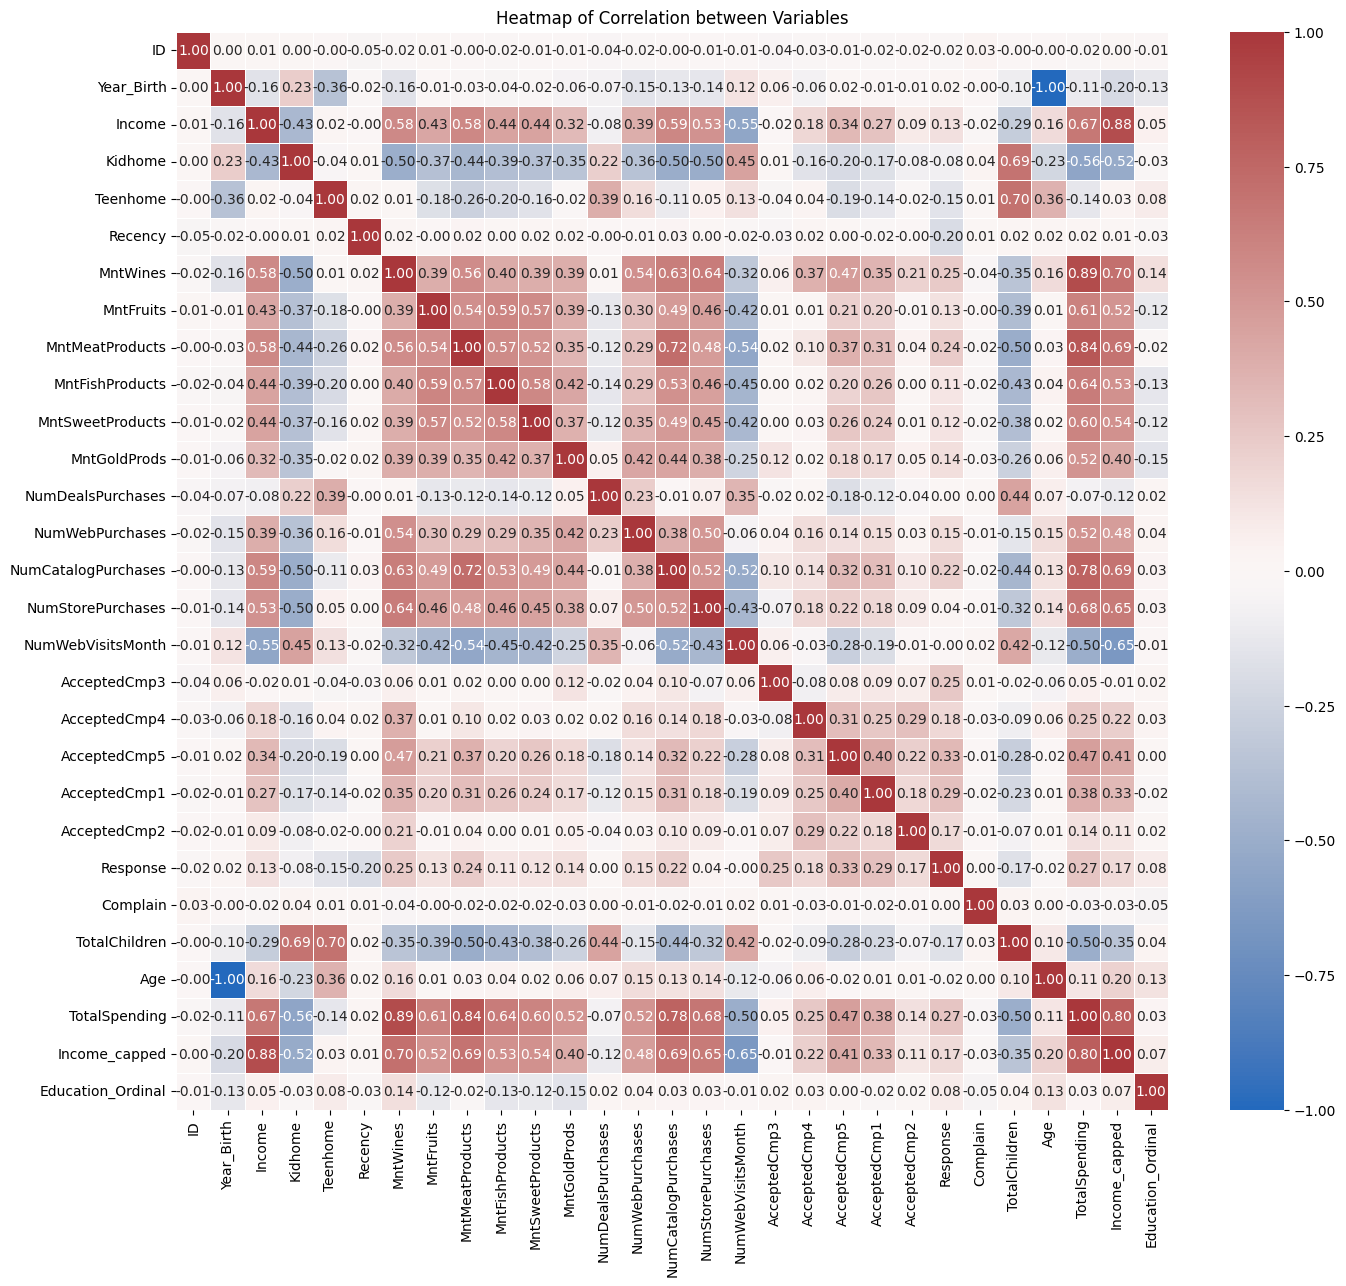

In [249]:
numeric_columns = df.select_dtypes(include=['number'])
# correlation matrix
correlation_matrix = numeric_columns.corr()

# heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation between Variables')
plt.show()

# •	Test the following hypotheses


o	Older people are not as tech-savvy and probably prefer shopping in-store.

In [252]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'TotalChildren',
       'Age', 'TotalSpending', 'Income_capped', 'Education_Ordinal'],
      dtype='object')


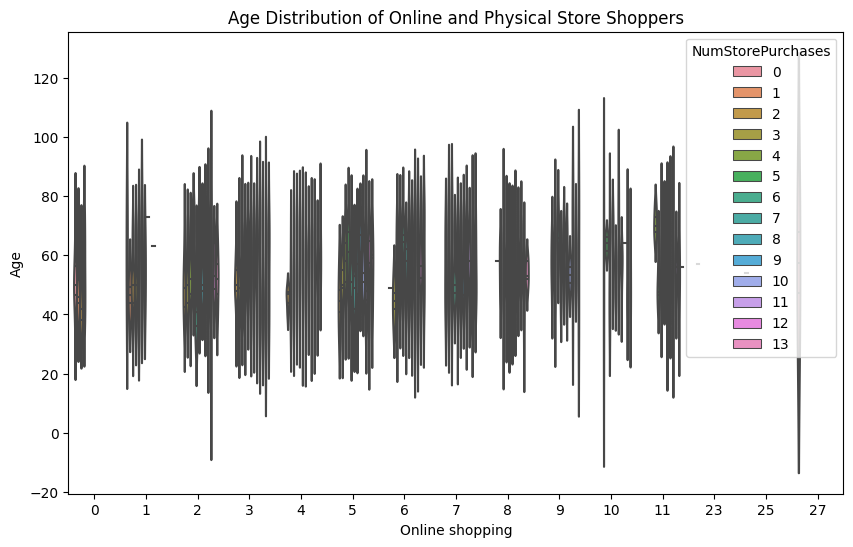

In [262]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='NumWebPurchases', y='Age', data=df, hue='NumStorePurchases', inner="quart")
plt.title('Age Distribution of Online and Physical Store Shoppers')
plt.xlabel('Online shopping')
plt.ylabel('Age')
plt.show()

In [257]:
from scipy.stats import ttest_ind

# DataFrame in two groups: online and in physical stores
online_shoppers = df[df['NumWebPurchases'] > 0]['Age']
instore_shoppers = df[df['NumStorePurchases'] > 0]['Age']

# independent samples t-test
t_stat, p_value = ttest_ind(online_shoppers, instore_shoppers, equal_var=False)

# result
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the ages between online and physical store shoppers.")
else:
    print("There is not enough evidence to reject the null hypothesis.This suggests that there is not a significant difference in ages between shoppers who prefer to shop online and those who prefer physical stores. Therefore, we cannot say that older people are less likely to be 'tech-savvy' and prefer physical stores.")

There is not enough evidence to reject the null hypothesis.This suggests that there is not a significant difference in ages between shoppers who prefer to shop online and those who prefer physical stores. Therefore, we cannot say that older people are less likely to be 'tech-savvy' and prefer physical stores.


o	Customers with kids probably have less time to visit a store and would prefer to shop online.

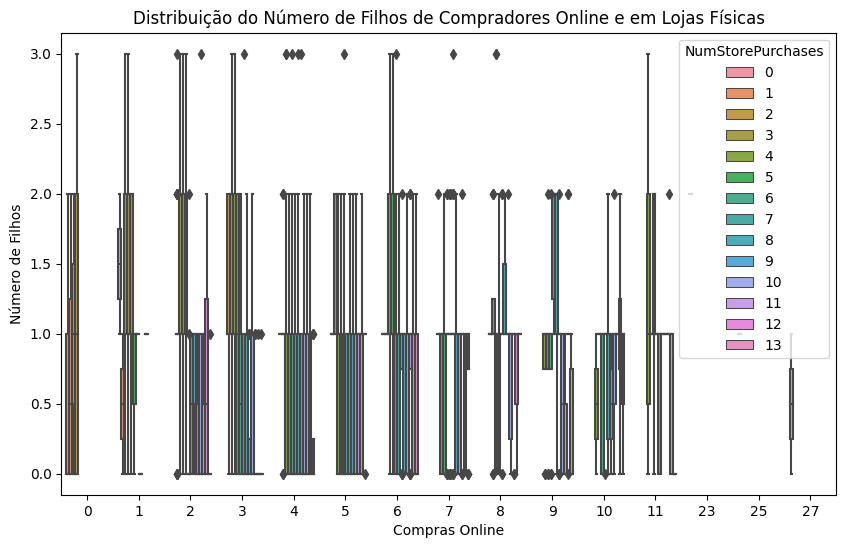

In [263]:
# Box plot for the number of children of online and in-store shoppers
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumWebPurchases', y='TotalChildren', data=df, hue='NumStorePurchases')
plt.title('Distribution of the Number of Children of Online and Physical Store Shoppers')
plt.xlabel('Online shopping')
plt.ylabel('Number of children')
plt.show()

Even though at first we think that there may be a big difference between online and physical shopping, we have to take into account the difference between individuals with children and without, so let's do the t test.


In [264]:
# DataFrame in two groups: online and in physical stores
online_shoppers_with_kids = df[(df['NumWebPurchases'] > 0) & (df['TotalChildren'] > 0)]['TotalChildren']
instore_shoppers_with_kids = df[(df['NumStorePurchases'] > 0) & (df['TotalChildren'] > 0)]['TotalChildren']

# independent samples t-test
t_stat_kids, p_value_kids = ttest_ind(online_shoppers_with_kids, instore_shoppers_with_kids, equal_var=False)

# result
if p_value_kids < alpha:
    print("We reject the null hypothesis. There is a significant difference in the number of children between online and physical store shoppers.")
else:
    print("There is not enough evidence to reject the null hypothesis.This suggests that there is no significant difference in the number of children between online shoppers and shoppers in physical stores. Therefore, we cannot say that customers with children are more likely to prefer online shopping due to a lack of time to visit physical stores.")

There is not enough evidence to reject the null hypothesis.This suggests that there is no significant difference in the number of children between online shoppers and shoppers in physical stores. Therefore, we cannot say that customers with children are more likely to prefer online shopping due to a lack of time to visit physical stores.


o	Other distribution channels may cannibalize sales at the store.

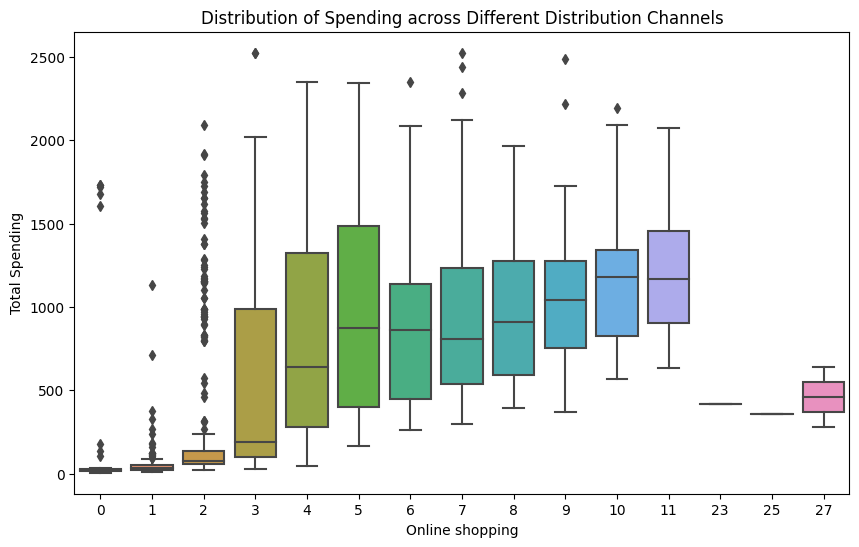

In [268]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumWebPurchases', y='TotalSpending', data=df)
plt.title('Distribution of Spending across Different Distribution Channels')
plt.xlabel('Online shopping')
plt.ylabel('Total Spending')
plt.show()

In [265]:
from scipy.stats import f_oneway

# DataFrame in groups: physical stores, websites, etc.
instore_sales = df[df['NumStorePurchases'] > 0]['TotalSpending']
website_sales = df[df['NumWebPurchases'] > 0]['TotalSpending']

# analysis of variance (ANOVA)
f_stat, p_value_anova = f_oneway(instore_sales, website_sales)

# result
if p_value_anova < alpha:
    print("We reject the null hypothesis. There is a significant difference in average expenses between different distribution channels.")
else:
    print("There is not enough evidence to reject the null hypothesis.This indicates that there is no significant difference in average spending between different distribution channels, such as physical stores and websites. Therefore, we cannot say that other distribution channels are cannibalizing physical store sales.")

There is not enough evidence to reject the null hypothesis.This indicates that there is no significant difference in average spending between different distribution channels, such as physical stores and websites. Therefore, we cannot say that other distribution channels are cannibalizing physical store sales.


o	Does the US fare significantly better than the rest of the world in terms of total purchases?

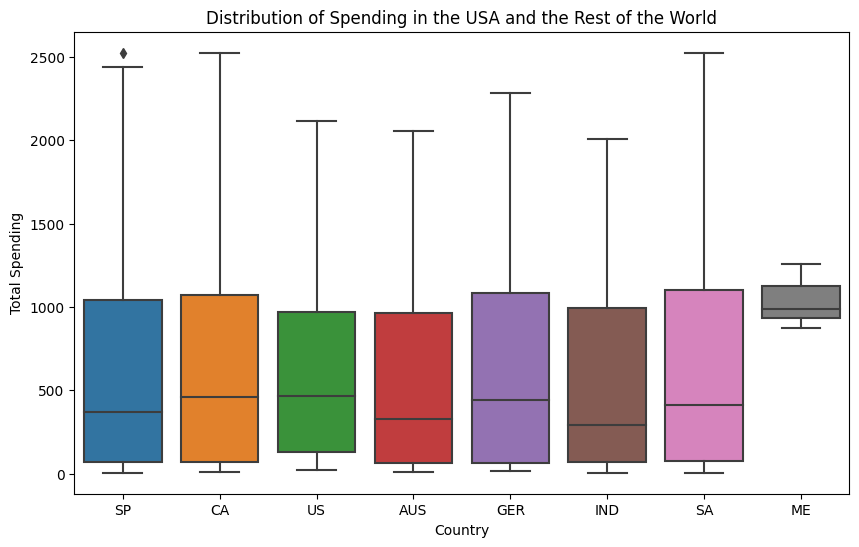

In [270]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='TotalSpending', data=df)
plt.title('Distribution of Spending in the USA and the Rest of the World')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.show()

In [271]:
# DataFrame in two groups: US and rest of the world
us_sales = df[df['Country'] == 'US']['TotalSpending']
rest_of_world_sales = df[df['Country'] != 'US']['TotalSpending']

# independent samples t-test
t_stat_us, p_value_us = ttest_ind(us_sales, rest_of_world_sales, equal_var=False)

# result
if p_value_us < alpha:
    print("We reject the null hypothesis. There is a significant difference in total spending between the US and the rest of the world.")
else:
    print("There is not enough evidence to reject the null hypothesis.This suggests that there is no significant difference in total spending between customers in the US and the rest of the world. Therefore, we cannot say that the US stands out significantly in terms of total purchases compared to the rest of the world.")

There is not enough evidence to reject the null hypothesis.This suggests that there is no significant difference in total spending between customers in the US and the rest of the world. Therefore, we cannot say that the US stands out significantly in terms of total purchases compared to the rest of the world.


# •	Use appropriate visualization to help analyze the following:

1. Product performance in terms of revenue:

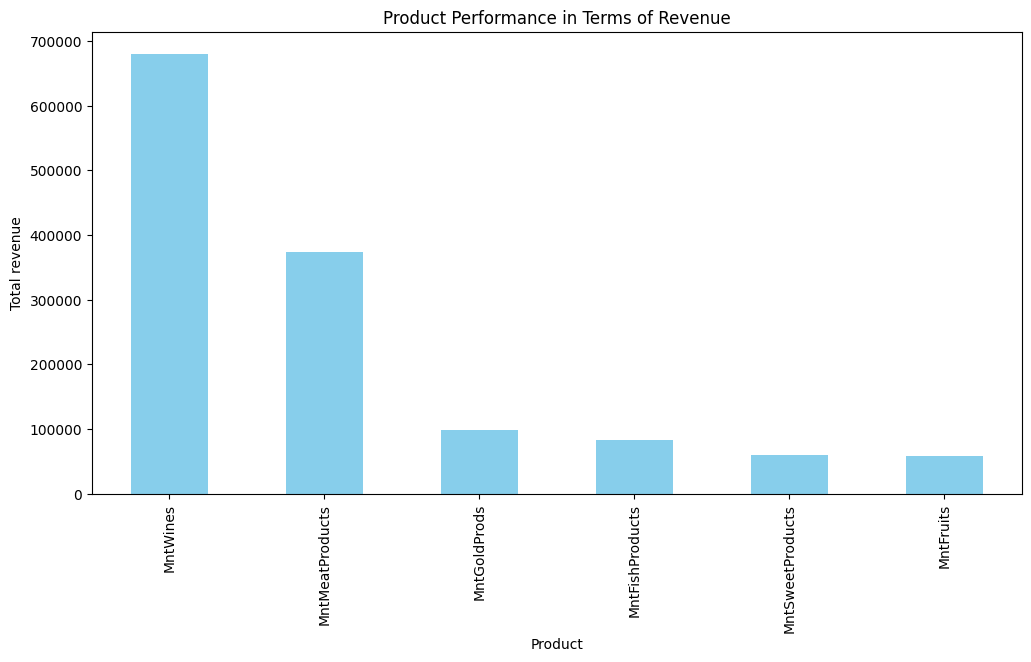

In [273]:
# Product performance
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[products].sum()

# Bar chart to show how products are performing in terms of revenue
plt.figure(figsize=(12, 6))
product_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Product Performance in Terms of Revenue')
plt.xlabel('Product')
plt.ylabel('Total revenue')
plt.show()

2. Relationship between Customer Age and Acceptance Rate of the Last Campaign:

<ipython-input-276-1483469c7297>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Response', data=df, ci=None)


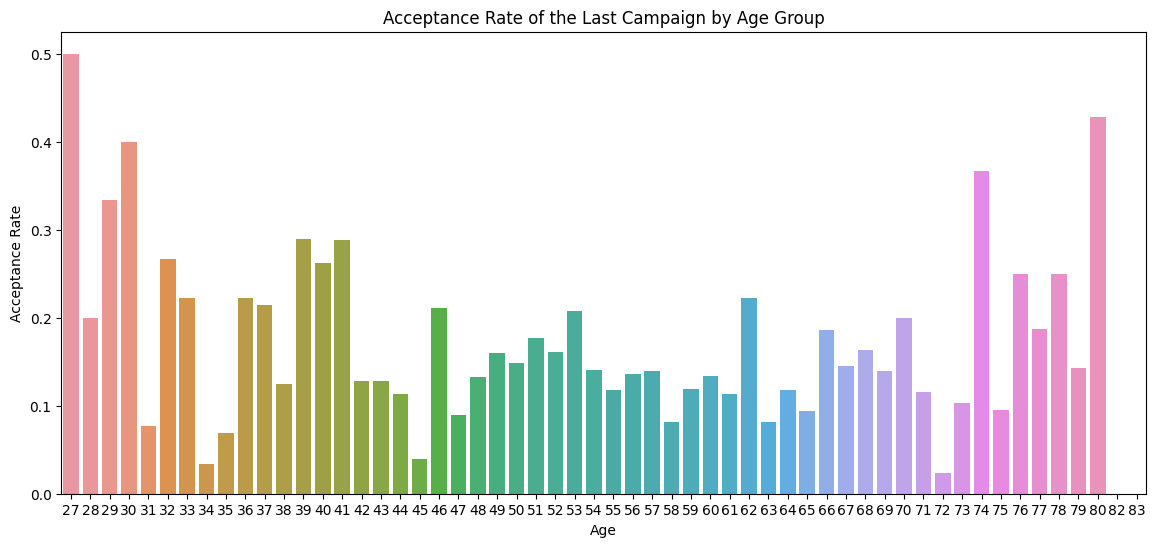

In [276]:
# Bar chart to explore the relationship between age and latest campaign acceptance rate
plt.figure(figsize=(14, 6))
sns.barplot(x='Age', y='Response', data=df, ci=None)
plt.title('Acceptance Rate of the Last Campaign by Age Group')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.show()

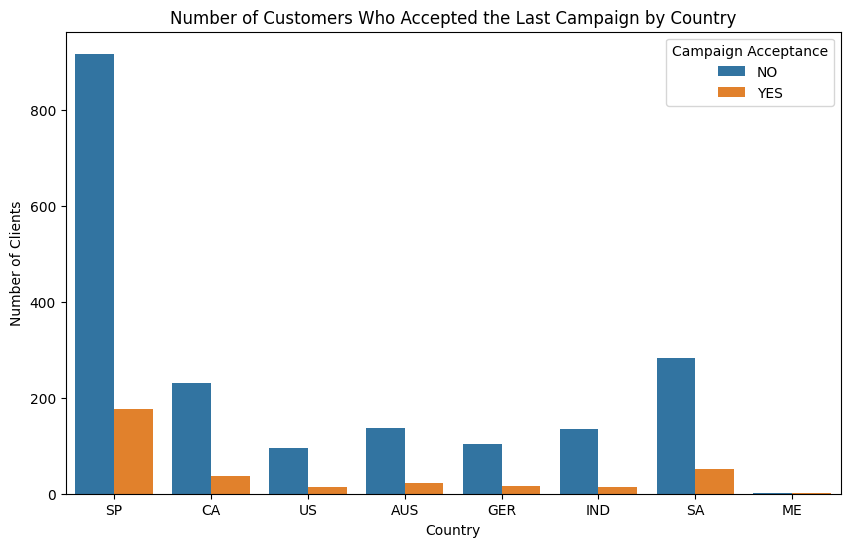

In [283]:
# Count of customers who opted in to the last campaign by country
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Response', data=df)
plt.legend(title='Campaign Acceptance', labels=['NO', 'YES'])
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Clients')
plt.show()

4. Spending Pattern in Relation to the Number of Children:

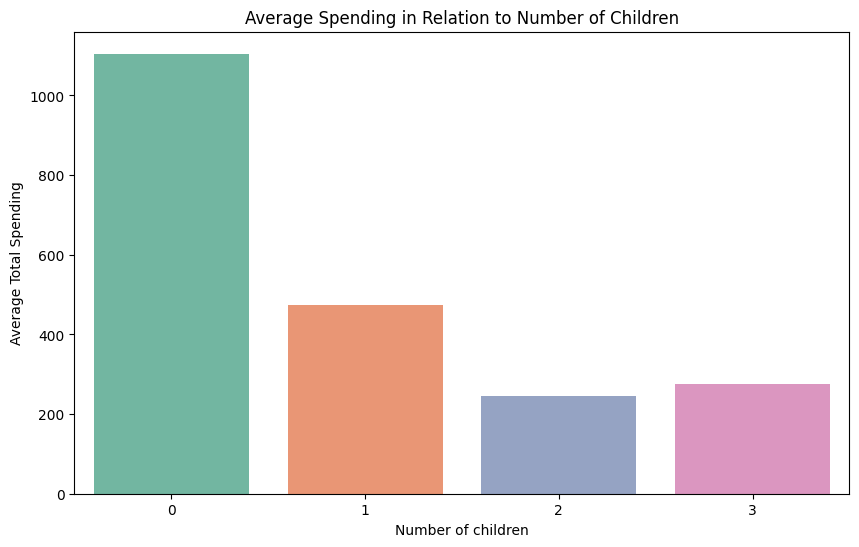

In [289]:
# Average expenses per number of children
avg_spending_by_children = df.groupby('TotalChildren')['TotalSpending'].mean().reset_index()

# Bar chart to explore the relationship between number of children and total spent
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalChildren', y='TotalSpending', data=avg_spending_by_children, palette='Set2')
plt.title('Average Spending in Relation to Number of Children')
plt.xlabel('Number of children')
plt.ylabel('Average Total Spending')
plt.show()

5. Education of Customers who have Complained in the Last 2 Years:

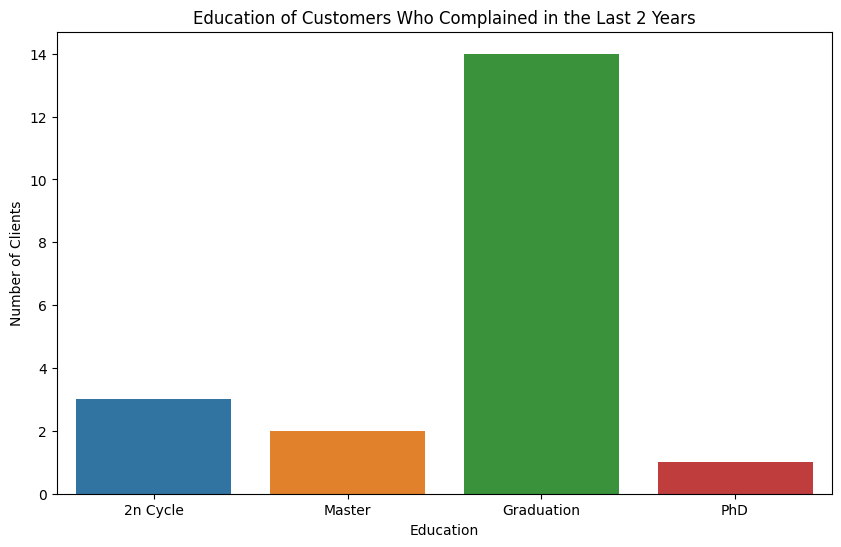

In [291]:
# Distribution of education of customers who complained in the last 2 years
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df[df['Complain'] == 1])
plt.title('Education of Customers Who Complained in the Last 2 Years')
plt.xlabel('Education')
plt.ylabel('Number of Clients')
plt.show()

#'########################################################'

# Project finished Thank you so much

#'########################################################'